## Initialization

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from collections import deque
import keras
from keras.metrics import R2Score
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD

## Data Loading

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes) 
X = auto_mpg.data.features
y = auto_mpg.data.targets
data = pd.concat([X, y], axis=1)
data.dropna(inplace=True)

In [3]:
X = data.drop(columns='mpg', inplace=False).values
y = data['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))
X_train, X_test = scalerX.transform(X_train), scalerX.transform(X_test)
y_train, y_test = scalery.transform(y_train.reshape(-1, 1)), scalery.transform(y_test.reshape(-1, 1))

## Modeling

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(25, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='tanh'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

In [6]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.1 , momentum=0.9), metrics=[R2Score()])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100 , callbacks=[LearningRateScheduler(scheduler)])

Epoch 1/100

9/9 [==============================] - 1s 27ms/step - loss: 0.4943 - r2_score: 0.5057 - val_loss: 0.2365 - val_r2_score: 0.7686 - lr: 0.1000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2348 - r2_score: 0.7652 - val_loss: 0.1784 - val_r2_score: 0.8255 - lr: 0.1000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2775 - r2_score: 0.7225 - val_loss: 0.2898 - val_r2_score: 0.7165 - lr: 0.1000
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1823 - r2_score: 0.8177 - val_loss: 0.1814 - val_r2_score: 0.8225 - lr: 0.1000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1678 - r2_score: 0.8322 - val_loss: 0.1662 - val_r2_score: 0.8374 - lr: 0.1000
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1967 - r2_score: 0.8033 - val_loss: 0.1594 - val_r2_score: 0.8441 - lr: 0.1000
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1927 - r2_sco

4/4 [==============================] - 0s 0s/step


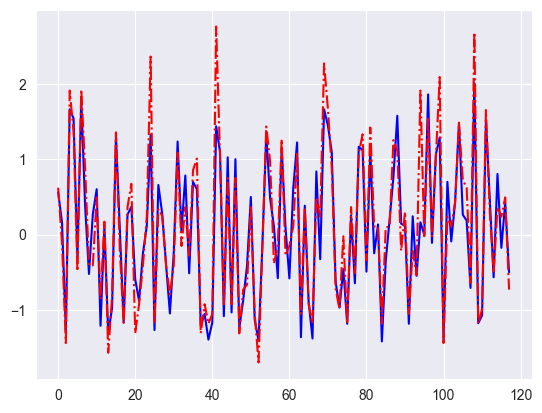

In [7]:
y_pre = model.predict(X_test)
plt.plot(y_pre , 'b')
plt.plot(y_test , 'r-.')